In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
# Carga desde un archivo .csv sin indice
df = pd.read_csv('Amsterdam_HotelRoom.csv')
df = df.drop(columns = ["Unnamed: 0"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  56 non-null     object 
 1   name                                          56 non-null     object 
 2   host_name                                     56 non-null     object 
 3   host_since                                    56 non-null     object 
 4   host_response_time                            56 non-null     object 
 5   host_response_rate                            56 non-null     object 
 6   host_acceptance_rate                          56 non-null     object 
 7   host_is_superhost                             56 non-null     object 
 8   host_identity_verified                        56 non-null     object 
 9   neighbourhood                                 56 non-null     objec

In [3]:
# Convertir la variable a tipo numerica 
encoder = LabelEncoder()
df['property_type'] = encoder.fit_transform(df['property_type'])

# Obtener el mapeo de categorías a números
categorias = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# Mostrar el diccionario con la correspondencia
categorias

{'Room in bed and breakfast': 0,
 'Room in boutique hotel': 1,
 'Room in hostel': 2,
 'Room in hotel': 3,
 'Room in serviced apartment': 4}

<Axes: xlabel='property_type', ylabel='price'>

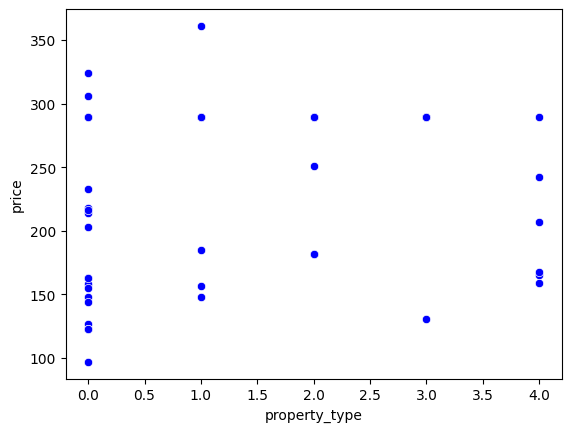

In [4]:
# Imprimimos el scatter plot entre la variable dependiente (price) e independiente (property_type) 
# para observar el comportamiento en su dipersión
from turtle import color

sns.scatterplot(x='property_type', y = 'price', color="blue", data = df)

In [5]:
# Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['property_type']]
Var_Dep = df ['price']

In [6]:
# Se define model como la función de regresión lineal 
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Verificamos la función relacioanada al modelo 
type(model)

sklearn.linear_model._base.LinearRegression

In [7]:
# Ajustamos el modelo con las variables antes declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

LinearRegression()

In [8]:
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([12.43587028]),
 'rank_': 1,
 'singular_': array([10.38886767]),
 'intercept_': 216.30919920582394}

**Modelo matematico**

In [9]:
# Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R 
model.score(Vars_Indep, Var_Dep)

0.0663276735969498

In [10]:
# Predeciumos los valores del precio del tipo de cuarto a partir de la variable "property_type" 
y_pred = model.predict( X = df [['property_type']])
y_pred

array([253.61681006, 253.61681006, 216.30919921, 228.74506949,
       241.18093977, 216.30919921, 216.30919921, 216.30919921,
       241.18093977, 266.05268034, 241.18093977, 216.30919921,
       228.74506949, 241.18093977, 241.18093977, 228.74506949,
       241.18093977, 241.18093977, 241.18093977, 228.74506949,
       228.74506949, 216.30919921, 241.18093977, 241.18093977,
       228.74506949, 216.30919921, 253.61681006, 253.61681006,
       253.61681006, 253.61681006, 253.61681006, 253.61681006,
       216.30919921, 216.30919921, 241.18093977, 228.74506949,
       216.30919921, 253.61681006, 216.30919921, 266.05268034,
       228.74506949, 216.30919921, 228.74506949, 216.30919921,
       216.30919921, 266.05268034, 216.30919921, 253.61681006,
       216.30919921, 228.74506949, 216.30919921, 266.05268034,
       216.30919921, 266.05268034, 266.05268034, 216.30919921])

In [11]:
# Insertanos la columnna de predicciones en el dataframe
df.insert(0, 'Predicciones', y_pred)
df

,Predicciones,last_scraped,name,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,253.616810,2024-09-06,Business & Leisure: Stylish Rooms w/ Full Kitchen,RoomPicks,2022-10-21,within an hour,94%,84%,f,t,...,4.90,4.80,4.90,4.90,4.80,4.70,1.0,1.0,0.0,0.0
1,253.616810,2024-09-06,Discover Local Brews: Stay Comfortably in Style,RoomPicks,2022-10-21,within an hour,94%,84%,f,t,...,5.00,5.00,5.00,5.00,5.00,5.00,1.0,1.0,0.0,0.0
2,216.309199,2024-09-06,TWO-ONE-TWO Luxury B&B Museum Quarter Amsterdam,Ard,2019-03-03,within a few hours,100%,100%,t,t,...,4.97,4.98,4.90,5.00,4.87,4.79,1.0,1.0,0.0,0.0
3,228.745069,2024-09-06,Standard Single · Modern downtown design room,The Social Hub,2023-03-02,undefined time,0%,100%,f,t,...,4.58,4.56,4.90,5.00,4.58,4.44,1.0,1.0,0.0,0.0
4,241.180940,2024-09-06,Generator - Deluxe King,Generator,2019-03-27,within an hour,98%,99%,f,t,...,4.90,4.37,4.90,5.00,4.62,4.70,1.0,1.0,0.0,0.0
5,216.309199,2024-09-06,Barok room private bathroom,C.T.,2013-02-18,within an hour,100%,100%,f,t,...,4.72,4.68,4.90,5.00,4.43,4.54,1.0,1.0,0.0,0.0
6,216.309199,2024-09-06,Authentic Suite with Canal View in Heart of City,Joost,2019-01-21,within an hour,100%,100%,t,t,...,4.92,4.95,4.96,4.92,4.99,4.76,1.0,1.0,0.0,0.0
7,216.309199,2024-09-05,"A-location, ensuite bathroom, centre - Milkmaid -",Matthijs,2012-08-16,within an hour,100%,100%,t,t,...,4.86,4.91,4.95,4.96,4.94,4.81,1.0,1.0,0.0,0.0
8,241.180940,2024-09-05,Bed in 6 Bed Dorm,Luke,2019-01-17,within an hour,100%,100%,f,f,...,4.62,4.30,4.90,4.78,4.62,4.49,1.0,1.0,0.0,0.0
9,266.052680,2024-09-05,SWEETS hotel Kinkerbrug,Sweets,2018-07-20,within an hour,98%,99%,f,f,...,4.82,4.81,4.88,4.77,4.68,4.54,1.0,1.0,0.0,0.0


<Axes: xlabel='property_type', ylabel='price'>

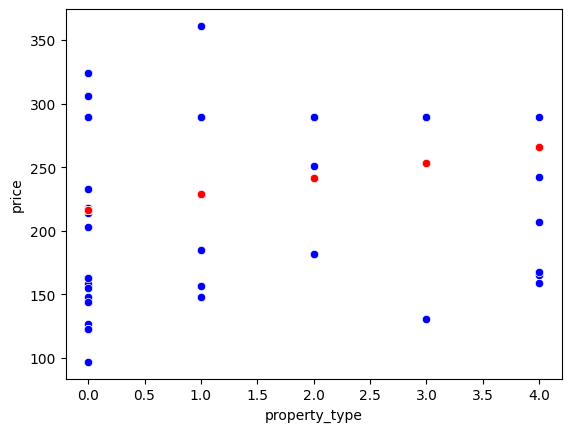

In [12]:
# Visualizamos la gráfica comparartiva entre el precio real y el precio predecido 

sns.scatterplot(x = 'property_type', y = 'price', color = "blue", data = df)
sns.scatterplot(x = 'property_type', y = 'Predicciones', color = "red", data = df)

In [13]:
# Corroboramos cual es el coeficiente de determianción de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.0663276735969498

In [14]:
# Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

0.2575415958577367

In [15]:
# Filtrar y eliminar columnas de tipo objeto
df = df.select_dtypes(exclude=['object'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 34 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Predicciones                                  56 non-null     float64
 1   property_type                                 56 non-null     int32  
 2   id                                            56 non-null     int64  
 3   scrape_id                                     56 non-null     int64  
 4   host_id                                       56 non-null     float64
 5   host_listings_count                           56 non-null     float64
 6   host_total_listings_count                     56 non-null     float64
 7   latitude                                      56 non-null     float64
 8   longitude                                     56 non-null     float64
 9   accommodates                                  56 non-null     float

In [17]:
# Encontramos todas las correlaciones entre las variables 
Corr_Factors = df.corr()

# Encontramos el valor absoluto de todas las correlaciones entre las variables
Corr_Factors1 = abs(Corr_Factors)

Corr_Factors1

,Predicciones,property_type,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
Predicciones,1.000000,1.000000,0.460432,NaN,0.267005,NaN,0.192655,0.404528,0.142925,0.035704,...,0.108543,0.077109,0.033196,0.202574,0.037196,0.104517,NaN,NaN,NaN,NaN
property_type,1.000000,1.000000,0.460432,NaN,0.267005,NaN,0.192655,0.404528,0.142925,0.035704,...,0.108543,0.077109,0.033196,0.202574,0.037196,0.104517,NaN,NaN,NaN,NaN
id,0.460432,0.460432,1.000000,NaN,0.293017,NaN,0.132755,0.692550,0.467623,0.239848,...,0.273740,0.188684,0.195516,0.073119,0.066368,0.254928,NaN,NaN,NaN,NaN
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,0.267005,0.267005,0.293017,NaN,1.000000,NaN,0.065958,0.078305,0.002874,0.219002,...,0.019864,0.177676,0.247033,0.235954,0.065277,0.144729,NaN,NaN,NaN,NaN
host_listings_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_total_listings_count,0.192655,0.192655,0.132755,NaN,0.065958,NaN,1.000000,0.182592,0.082888,0.213517,...,0.093557,0.145865,0.068340,0.089313,0.206377,0.166951,NaN,NaN,NaN,NaN
latitude,0.404528,0.404528,0.692550,NaN,0.078305,NaN,0.182592,1.000000,0.415596,0.200223,...,0.215688,0.324255,0.268225,0.022400,0.163646,0.357819,NaN,NaN,NaN,NaN
longitude,0.142925,0.142925,0.467623,NaN,0.002874,NaN,0.082888,0.415596,1.000000,0.224408,...,0.288344,0.296954,0.070419,0.301983,0.157548,0.321785,NaN,NaN,NaN,NaN
accommodates,0.035704,0.035704,0.239848,NaN,0.219002,NaN,0.213517,0.200223,0.224408,1.000000,...,0.080442,0.006771,0.097423,0.077622,0.097688,0.015075,NaN,NaN,NaN,NaN


c:\Users\yulia\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

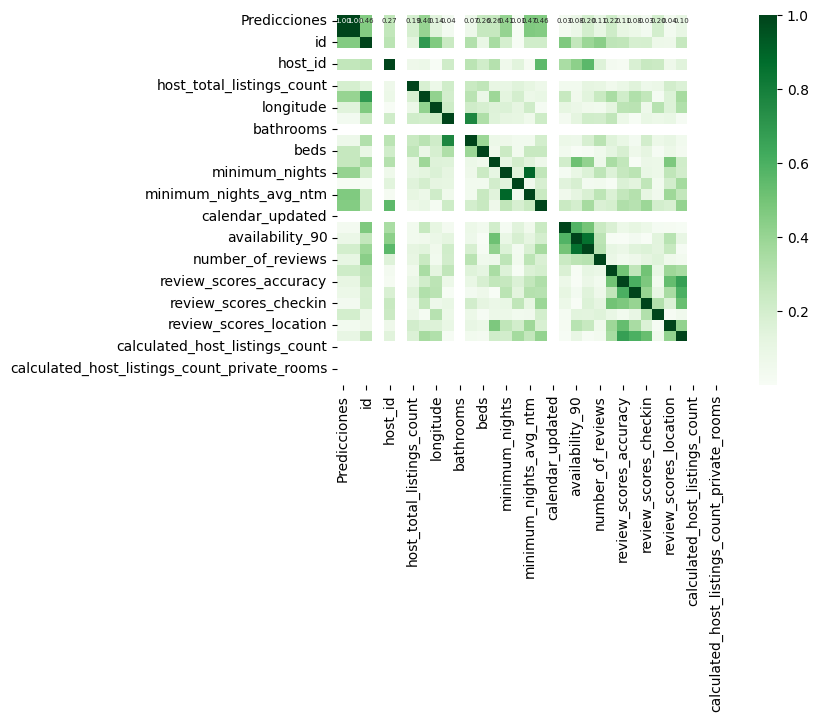

In [18]:
# Ajustamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap = 'Greens', annot = True, fmt = ".2f", annot_kws={"size": 5})

Heat_Map